In [1]:
import json
import numpy as np
import os
from matplotlib import pyplot as plt
from glob import glob

In [ ]:
glob("")

In [138]:
json_files = glob("/home/woody/i9vl/i9vl106h/data/lidar4d_data_res_600/qualitative//600_metrics.json")
with open(json_files[0], 'r') as f:
    data = json.load(f)
# sort by keys
data = dict(sorted(data.items()))

In [139]:
data

{'preds_spade_res_600_masked_100': {'mse': 588.8631858605795,
  'ssim': 0.5348438025136825,
  'l1': 14454458.534351146,
  'psnr': 20.662179225878283,
  'lpips': 0.3350206540741083},
 'preds_spade_res_600_masked_200': {'mse': 663.0449785647651,
  'ssim': 0.5297753949136953,
  'l1': 15525522.774809161,
  'psnr': 20.202980280212476,
  'lpips': 0.3152522760948152},
 'preds_spade_res_600_masked_300': {'mse': 747.1465707503481,
  'ssim': 0.5145221803324637,
  'l1': 15384640.6870229,
  'psnr': 19.661317926353966,
  'lpips': 0.33854919711824594},
 'preds_spade_res_600_masked_400': {'mse': 731.8192999192461,
  'ssim': 0.5129521654413087,
  'l1': 14914987.30534351,
  'psnr': 19.774320350552806,
  'lpips': 0.341468887929698},
 'preds_spade_res_600_masked_500': {'mse': 803.4604364202892,
  'ssim': 0.5074774717061221,
  'l1': 14893008.080152672,
  'psnr': 19.42186486269224,
  'lpips': 0.35129807320714906},
 'preds_spade_res_600_masked_600': {'mse': 836.5057357452908,
  'ssim': 0.5027180418126144,
 

In [148]:
metric_to_plot = 'ssim'
# key to label mapping
key_to_label = {
    "vanilla": "Unmasked",
    "masked": "Masked using projected LiDAR",
    "masked_no_data": "Masked -1 values"
}


plotting_dict = {
    "vanilla": (),
    "masked": (),
    "masked_no_data": ()
}
for key in plotting_dict.keys():
    data_keys = [k for k in data.keys() if key in k]
    # for masked do not include masked_no_data
    if key == "masked":
        data_keys = [k for k in data_keys if "masked_no_data" not in k]
    data_x = list(range(100, 800, 100))
    data_y = []
    for k in data_keys:
        data_y.append(data[k][metric_to_plot])
    
    plotting_dict[key] = (data_x, data_y)

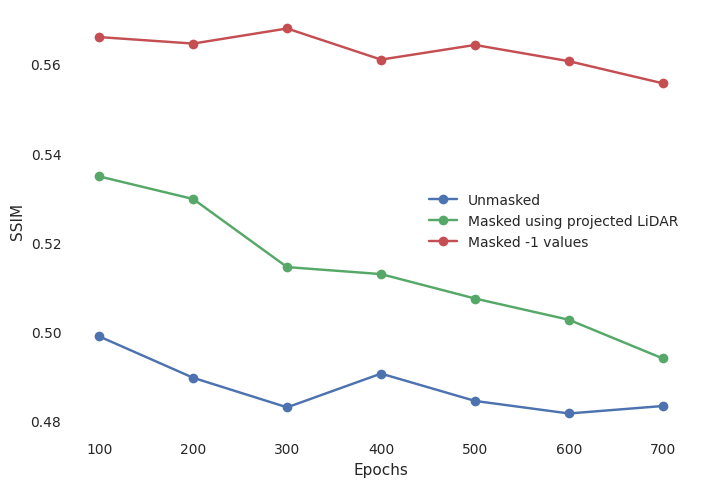

In [149]:
plt.figure()
# change plot style to seaborn
plt.style.use('seaborn')

for key, (x, y) in plotting_dict.items():
    plt.plot(x, y, label=key_to_label[key], marker='o')

plt.xlabel('Epochs')
plt.ylabel(metric_to_plot.upper())

plt.legend()
plt.grid(False)
# change background color
plt.gca().set_facecolor('white')
# change grid color
# plt.grid(color='grey', linestyle='-', linewidth=0.25)
# plt.show()
plt.savefig(f'./{metric_to_plot}_600_res.png', dpi=300)


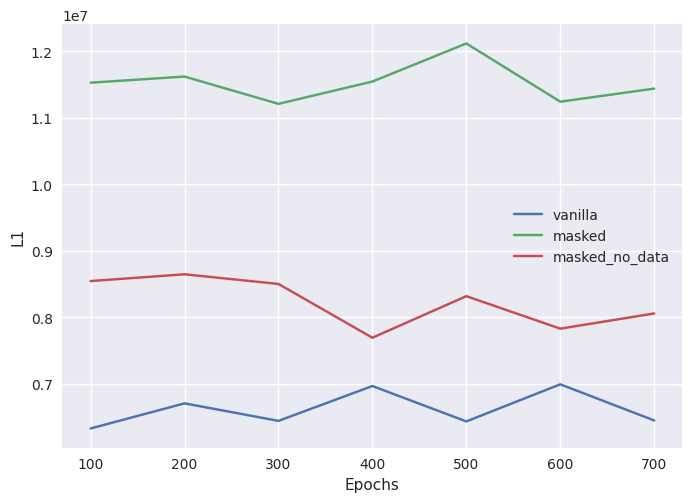

In [80]:
plt.figure()

for key, (x, y) in plotting_dict.items():
    plt.plot(x, y, label=key)

plt.xlabel('Epochs')
plt.ylabel(metric_to_plot.upper())

plt.legend()
plt.show()


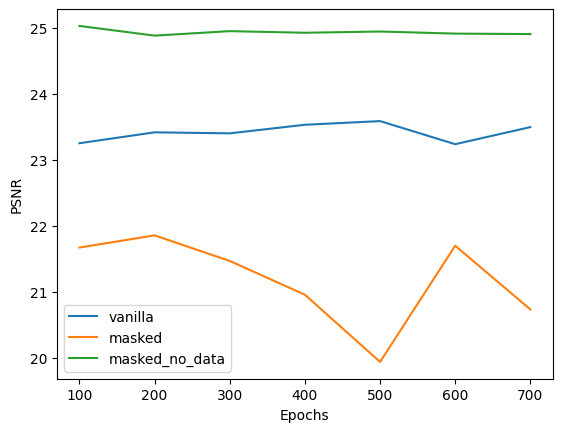

In [27]:
plt.figure()

for key, (x, y) in plotting_dict.items():
    plt.plot(x, y, label=key)

plt.xlabel('Epochs')
plt.ylabel(metric_to_plot.upper())

plt.legend()
plt.show()


In [2]:
from kitti360scripts.viewer.kitti360Viewer3DRaw import *

import os
os.environ["KITTI360_DATASET"] = "/home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360"

from glob import glob
from PIL import Image
import numpy as np
import shutil

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Please install the module 'Pillow' for image processing, e.g.
pip install pillow
Traceback (most recent call last):
  File "/home/hpc/i9vl/i9vl106h/kitti360Scripts/kitti360scripts/helpers/csHelpers.py", line 19, in <module>
    from PIL import PILLOW_VERSION
ImportError: cannot import name 'PILLOW_VERSION' from 'PIL' (/home/woody/i9vl/i9vl106h/software/privat/conda/envs/spade/lib/python3.7/site-packages/PIL/__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/woody/i9vl/i9vl106h/software/privat/conda/envs/spade/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1374816/204042070.py", line 1, in <module>
    from kitti360scripts.viewer.kitti360Viewer3DRaw import *
  File "/home/hpc/i9vl/i9vl106h/kitti360Scripts/kitti360scripts/viewer/kitti360Viewer3DRaw.py", line 23, in <module>
    from kitti360scr

TypeError: object of type 'NoneType' has no len()

In [ ]:
seq_list = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
data_path = "/home/woody/i9vl/i9vl106h/data/img2img_360"

In [3]:
from kitti360scripts.helpers.project import CameraPerspective, CameraFisheye
from PIL import Image
import matplotlib.pyplot as plt

if 'KITTI360_DATASET' in os.environ:
    kitti360Path = os.environ['KITTI360_DATASET']
else:
    kitti360Path = os.path.join(os.path.dirname(
                            os.path.realpath(__file__)), '..', '..')
seq = 0000
cam_id = 1


sequence = '2013_05_28_drive_%04d_sync'%seq

# perspective camera
if cam_id in [0,1]:
    camera = CameraPerspective(kitti360Path, sequence, cam_id)
# fisheye camera
elif cam_id in [2,3]:
    camera = CameraFisheye(kitti360Path, sequence, cam_id)
else:
    raise RuntimeError('Unknown camera ID!')

# object for parsing 3d raw data 
velo = Kitti360Viewer3DRaw(mode='velodyne', seq=seq)

# take the rectification into account for perspective cameras
if cam_id==0 or cam_id == 1:
    TrVeloToRect = np.matmul(camera.R_rect, velo.TrVeloToCam['image_%02d' % cam_id])
else:
    TrVeloToRect = velo.TrVeloToCam['image_%02d' % cam_id]

ModuleNotFoundError: No module named 'yaml'

In [4]:
data_path = '/home/woody/i9vl/i9vl106h/data/lidar4d_data'

In [5]:
seq_ids = [
            "1538", 
            "1728", 
            "1908", 
            "2350", 
            "3353", 
            "4950", 
            "8120", 
            "10200", 
            "10750", 
            "11400",
            "275",
            "350",
            "480",
            "550",
            "2000",
            "2280",
            "2580",
            "2390",
            "2690",
            "2900",
            "3000",
            "3200"
            ]

In [152]:
frame_id = "0001"
seq_id = "1908"

In [153]:
cam_id = 1

In [154]:
len(seq_ids)*64

1408

In [11]:
# clean up
for sub_dir in ["train_A", "train_B", "overlayed_images", "train_masks"]:
    if os.path.exists(os.path.join(data_path, sub_dir)):
        shutil.rmtree(os.path.join(data_path, sub_dir))
for sub_dir in ["train_A", "train_B", "overlayed_images", "train_masks"]:
    if not os.path.exists(os.path.join(data_path, sub_dir)):
        os.makedirs(os.path.join(data_path, sub_dir))

In [6]:
a = glob("/home/woody/i9vl/i9vl106h/data/lidar4d_data/train_A/*") + glob("/home/woody/i9vl/i9vl106h/data/lidar4d_data/test_A/*")

In [7]:
a = [os.path.basename(x) for x in a]

In [11]:
train_dir = "/home/woody/i9vl/i9vl106h/data/lidar4d_data_res_300/train_A/"
test_dir = "/home/woody/i9vl/i9vl106h/data/lidar4d_data_res_300/test_A/"

In [14]:
total = 0
for i, seq_id in enumerate(sorted(seq_ids)):
    count = 0
    seq_id_int = int(seq_id)
    # fname of format 0000_000000{seq_id}.png
    fname = f"0000_{seq_id_int:010d}.png"
    while(os.path.exists(f"{train_dir}/{fname}") or os.path.exists(f"{test_dir}/{fname}")):
        count += 1
        seq_id_int += 1
        fname = f"0000_{seq_id_int:010d}.png"
        # check if seq_id is in the list
        if str(seq_id_int) in  seq_ids:
            break

    
    print(f"sequence: {seq_id}, sequence start: {seq_id}, sequnece end: {seq_id_int-1} count: {count}")
    total += count

print(total)

sequence: 10200, sequence start: 10200, sequnece end: 10301 count: 51
sequence: 10750, sequence start: 10750, sequnece end: 10851 count: 51
sequence: 11400, sequence start: 11400, sequnece end: 11501 count: 51
sequence: 1538, sequence start: 1538, sequnece end: 1665 count: 64
sequence: 1728, sequence start: 1728, sequnece end: 1855 count: 64
sequence: 1908, sequence start: 1908, sequnece end: 2035 count: 64
sequence: 2000, sequence start: 2000, sequnece end: 2127 count: 64
sequence: 2280, sequence start: 2280, sequnece end: 2407 count: 64
sequence: 2350, sequence start: 2350, sequnece end: 2429 count: 40
sequence: 2390, sequence start: 2390, sequnece end: 2517 count: 64
sequence: 2580, sequence start: 2580, sequnece end: 2707 count: 64
sequence: 2690, sequence start: 2690, sequnece end: 2817 count: 64
sequence: 275, sequence start: 275, sequnece end: 404 count: 65
sequence: 2900, sequence start: 2900, sequnece end: 3027 count: 64
sequence: 3000, sequence start: 3000, sequnece end: 3127

In [10]:
total = 0
for i, seq_id in enumerate(sorted(seq_ids)):
    count = 0
    seq_id_int = int(seq_id)
    # fname of format 0000_000000{seq_id}.png
    fname = f"0000_{seq_id_int:010d}.png"
    while(os.path.exists(f"{train_dir}/{fname}") or os.path.exists(f"{test_dir}/{fname}")):
        count += 1
        seq_id_int += 1
        fname = f"0000_{seq_id_int:010d}.png"
        # check if seq_id is in the list
        if str(seq_id_int) in  seq_ids:
            break

    
    print(f"seq_id: {seq_id}, count: {count}")
    total += count

print(total)

seq_id: 10200, count: 51
seq_id: 10750, count: 51
seq_id: 11400, count: 51
seq_id: 1538, count: 64
seq_id: 1728, count: 64
seq_id: 1908, count: 64
seq_id: 2000, count: 64
seq_id: 2280, count: 64
seq_id: 2350, count: 40
seq_id: 2390, count: 64
seq_id: 2580, count: 64
seq_id: 2690, count: 64
seq_id: 275, count: 0
seq_id: 2900, count: 64
seq_id: 3000, count: 64
seq_id: 3200, count: 64
seq_id: 3353, count: 64
seq_id: 350, count: 0
seq_id: 480, count: 52
seq_id: 4950, count: 51
seq_id: 550, count: 65
seq_id: 8120, count: 51
1180


In [191]:
total = 0
for seq_id in sorted(set(seq_ids)):
    # /home/woody/i9vl/i9vl106h/Results/Simulation_LiDAR4D/kitti360_lidar4d_f{seq_id}_release_2/points
    # /home/hpc/b204dc/b204dc15/LiDAR4D/log/kitti360_lidar4d_f4950_release
    fs = glob(f"/home/woody/i9vl/i9vl106h/Results/jupyter_job/kitti360_lidar4d_f{seq_id}_release_2/points/lidar4d_*.npy")
    
    total += len(fs)
    print(f"Processing {seq_id} with {len(fs)} frames")

print(f"Total: {total}")

Processing 10200 with 51 frames
Processing 10750 with 51 frames
Processing 11400 with 51 frames
Processing 1538 with 64 frames
Processing 1728 with 64 frames
Processing 1908 with 64 frames
Processing 2000 with 64 frames
Processing 2280 with 64 frames
Processing 2350 with 51 frames
Processing 2390 with 64 frames
Processing 2580 with 64 frames
Processing 2690 with 64 frames
Processing 275 with 65 frames
Processing 2900 with 64 frames
Processing 3000 with 64 frames
Processing 3200 with 64 frames
Processing 3353 with 64 frames
Processing 350 with 65 frames
Processing 480 with 52 frames
Processing 4950 with 51 frames
Processing 550 with 65 frames
Processing 8120 with 51 frames
Total: 1321


In [29]:
for seq_id in seq_ids:
    # /home/woody/i9vl/i9vl106h/Results/Simulation_LiDAR4D/kitti360_lidar4d_f{seq_id}_release_2/points
    # /home/hpc/b204dc/b204dc15/LiDAR4D/log/kitti360_lidar4d_f4950_release
    fs = glob(f"/home/woody/i9vl/i9vl106h/Results/jupyter_job/kitti360_lidar4d_f{seq_id}_release_2/points/lidar4d_*.npy")
    TrVeloToRect = np.matmul(camera.R_rect, velo.TrVeloToCam['image_%02d' % cam_id])
    # TrVeloToRect = velo.TrVeloToCam['image_%02d' % cam_id]    
    for frame, filepath in enumerate(fs):
        frame_id = str(frame+1).zfill(4)
        # points = np.load(f"/home/woody/i9vl/i9vl106h/Results/jupyter_job/kitti360_lidar4d_f{seq_id}_release_3/lidar_pred/val_lidar4d_ep0639_{frame_id}_lidar.npy")
        # homogenize the points
        # points = np.concatenate([points, np.ones((points.shape[0], 1))], axis=1)
        points = np.load(filepath)
        # points[:,3] = points_[:,3]
        # points = velo.curlVelodyneData(frame_id, points)
        intensity = points[:, 3].copy()
        points[:, 3] = 1

        pointsCam = np.matmul(TrVeloToRect, points.T).T
        pointsCam = pointsCam[:,:3]
        # project to image space
        u,v, depth= camera.cam2image(pointsCam.T)
        u = u.astype(np.int32)
        v = v.astype(np.int32)

        # camera.height = 2000
        # camera.width = 3500

        # prepare depth map for visualization
        depthMap = np.zeros((camera.height, camera.width))
        depthImage = np.zeros((camera.height, camera.width, 3))
        mask = np.logical_and(np.logical_and(np.logical_and(u>=0, u<camera.width), v>=0), v<camera.height)
        # visualize points within 50 meters
        mask = np.logical_and(np.logical_and(mask, depth>0), depth<50)

        binary_frame = np.zeros((camera.height, camera.width))
        # use original points[:,3] to visualize intensity
        if intensity.max() <= 1:
            intensity = (intensity*255).astype(np.uint8)

        binary_frame[v[mask],u[mask]] = intensity[mask]
        # print("range of intensity", np.min(intensity), np.max(intensity))
        
        original_image_id = str(int(seq_id)+frame).zfill(10)
        # save intensity image
        img = Image.fromarray(binary_frame.astype(np.uint8))
        img.save(os.path.join(data_path, "train_B/" f"{str(seq).zfill(4)}_{original_image_id}.png"))

        # save rgb image
        img_path = os.path.join(kitti360Path, 'data_2d_raw', sequence, 'image_%02d'%cam_id, 'data_rect', f"{original_image_id}.png")
        img_rgb = Image.open(img_path)
        img_rgb.save(os.path.join(data_path, "train_A/" f"{str(seq).zfill(4)}_{original_image_id}.png"))

        
        # overlayed intensity on rgb image 0-255/3 = 85 per channel scaled to 0-255
        overlayed_image = np.array(img_rgb)
        overlayed_image[v[mask],u[mask],0] = np.where(intensity[mask] < 85, intensity[mask]*3, overlayed_image[v[mask],u[mask],0])
        overlayed_image[v[mask],u[mask],1] = np.where((intensity[mask] < 170) & (intensity[mask] > 85), (intensity[mask]-85)*3, overlayed_image[v[mask],u[mask],1])
        overlayed_image[v[mask],u[mask],2] = np.where(intensity[mask] > 170, (intensity[mask]-170)*3, overlayed_image[v[mask],u[mask],2])


        overlayed_img = Image.fromarray(overlayed_image.astype(np.uint8))
        overlayed_img.save(os.path.join(data_path, "overlayed_images/" f"{str(seq).zfill(4)}_{original_image_id}.png"))


        mask_image = np.zeros((camera.height, camera.width))
        mask_image[v[mask],u[mask]] = 255

        mask_img = Image.fromarray(mask_image.astype(np.uint8))
        mask_img.save(os.path.join(data_path, "train_masks/" f"{str(seq).zfill(4)}_{original_image_id}.png"))

/home/hpc/i9vl/i9vl106h/kitti360Scripts/kitti360scripts/helpers/project.py:145: RuntimeWarning: invalid value encountered in cast
  u = np.round(points_proj[:,0,:]/np.abs(depth)).astype(np.int32)
/home/hpc/i9vl/i9vl106h/kitti360Scripts/kitti360scripts/helpers/project.py:146: RuntimeWarning: invalid value encountered in cast
  v = np.round(points_proj[:,1,:]/np.abs(depth)).astype(np.int32)


In [74]:
!cat /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_poses/2013_05_28_drive_0000_sync/oxts/dataformat.txt

lat:   latitude of the oxts-unit (deg)
lon:   longitude of the oxts-unit (deg)
alt:   altitude of the oxts-unit (m)
roll:  roll angle (rad),    0 = level, positive = left side up,      range: -pi   .. +pi
pitch: pitch angle (rad),   0 = level, positive = front down,        range: -pi/2 .. +pi/2
yaw:   heading (rad),       0 = east,  positive = counter clockwise, range: -pi   .. +pi
vn:    velocity towards north (m/s)
ve:    velocity towards east (m/s)
vf:    forward velocity, i.e. parallel to earth-surface (m/s)
vl:    leftward velocity, i.e. parallel to earth-surface (m/s)
vu:    upward velocity, i.e. perpendicular to earth-surface (m/s)
ax:    acceleration in x, i.e. in direction of vehicle front (m/s^2)
ay:    acceleration in y, i.e. in direction of vehicle left (m/s^2)
az:    acceleration in z, i.e. in direction of vehicle top (m/s^2)
af:    forward acceleration (m/s^2)
al:    leftward acceleration (m/s^2)
au:    upward acceleration (m/s^2)
wx:    angular rate around x (rad/s)
wy: 

In [9]:
pose_files = glob("/home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_poses/2013_05_28_drive_0000_sync/oxts/data/*")

In [80]:
!cat {pose_files[0]}

49.017850292655 8.4411424618216 115.24910736084 0.046773 -0.039641 -0.4983716732051 0.01971402680825 -0.082006438931654 -0.081427265098402 0.02200042894713 -0.010144192376072 0.56101998152397 0.48521555849307 9.767502286363 0.17713637707265 0.027489574766685 9.794009079853 -0.00039279215828153 -0.0066974286606029 0.014309681030815 -0.00094238054355867 -0.0073599092567335 0.013953006768931 0.019849433241279 0.016970562748477 4 15 6 6 0


In [10]:
lats = []
lons = []
ids = []

for pose_file in pose_files:
    id = pose_file.split("/")[-1].split(".")[0]
    ids.append(int(id))
    with open(pose_file, 'r') as f:
        lines = f.readlines()
        lat = float(lines[0].split()[0])
        lon = float(lines[0].split()[1])

        lats.append(lat)
        lons.append(lon)
        

In [11]:
lats = np.array(lats)
lons = np.array(lons)
ids = np.array(ids)

In [12]:
import matplotlib.pyplot as plt

In [13]:
# selected between two ids
start = 2280
num_frames = 64
end = start + num_frames - 1 
selected = np.logical_and(ids>=start, ids<=end)

In [21]:
ls /home/woody/i9vl/i9vl106h/data/lidar4d_data_partial/val/val_B/

0000_0000000481.png  0000_0000001960.png  0000_0000003414.png
0000_0000000486.png  0000_0000001962.png  0000_0000004950.png
0000_0000000487.png  0000_0000002004.png  0000_0000004951.png
0000_0000000490.png  0000_0000002023.png  0000_0000004954.png
0000_0000000491.png  0000_0000002024.png  0000_0000004955.png
0000_0000000496.png  0000_0000002026.png  0000_0000004962.png
0000_0000000498.png  0000_0000002030.png  0000_0000004968.png
0000_0000000499.png  0000_0000002038.png  0000_0000004972.png
0000_0000000500.png  0000_0000002039.png  0000_0000004975.png
0000_0000000501.png  0000_0000002041.png  0000_0000004977.png
0000_0000000506.png  0000_0000002043.png  0000_0000004986.png
0000_0000000513.png  0000_0000002046.png  0000_0000004992.png
0000_0000000525.png  0000_0000002054.png  0000_0000004997.png
0000_0000000529.png  0000_0000002062.png  0000_0000008120.png
0000_0000000551.png  0000_0000002284.png  0000_0000008131.png
0000_0000000560.png  0000_0000002288.png  0000_0000008137.png
0000_000

In [38]:
a = Image.open("/home/woody/i9vl/i9vl106h/data/lidar4d_data_partial/val/val_B/0000_0000001958.png")

In [39]:
a = np.array(a)

In [40]:
0.4*3

0.39893617021276595

In [35]:
# clip out top 150 pixels out of 376 and keep the rest
# current (1408, 376)

# a.crop((0, 160, 1408, 376))
# apply same on np array
a[160:376, :] = 0


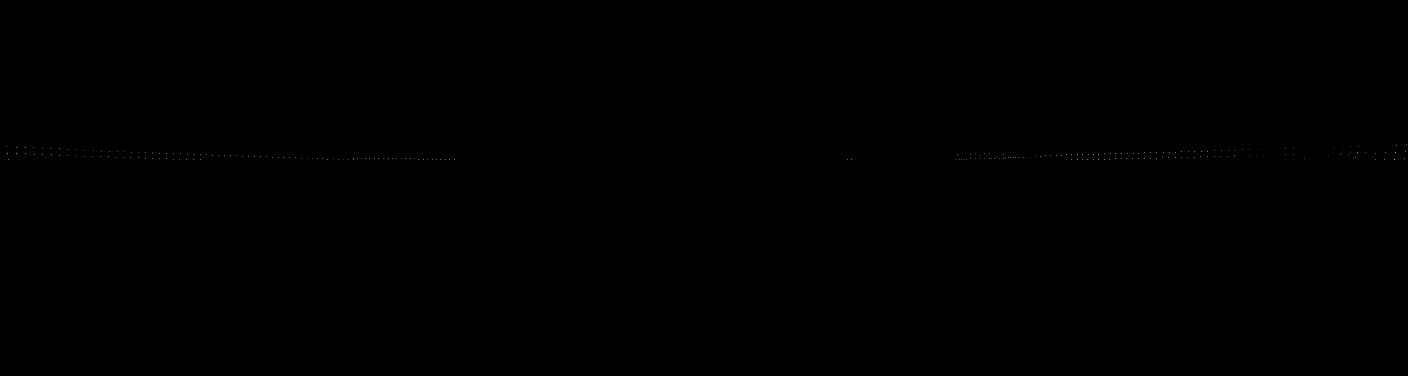

In [37]:
Image.fromarray(a)

In [14]:
end

2343

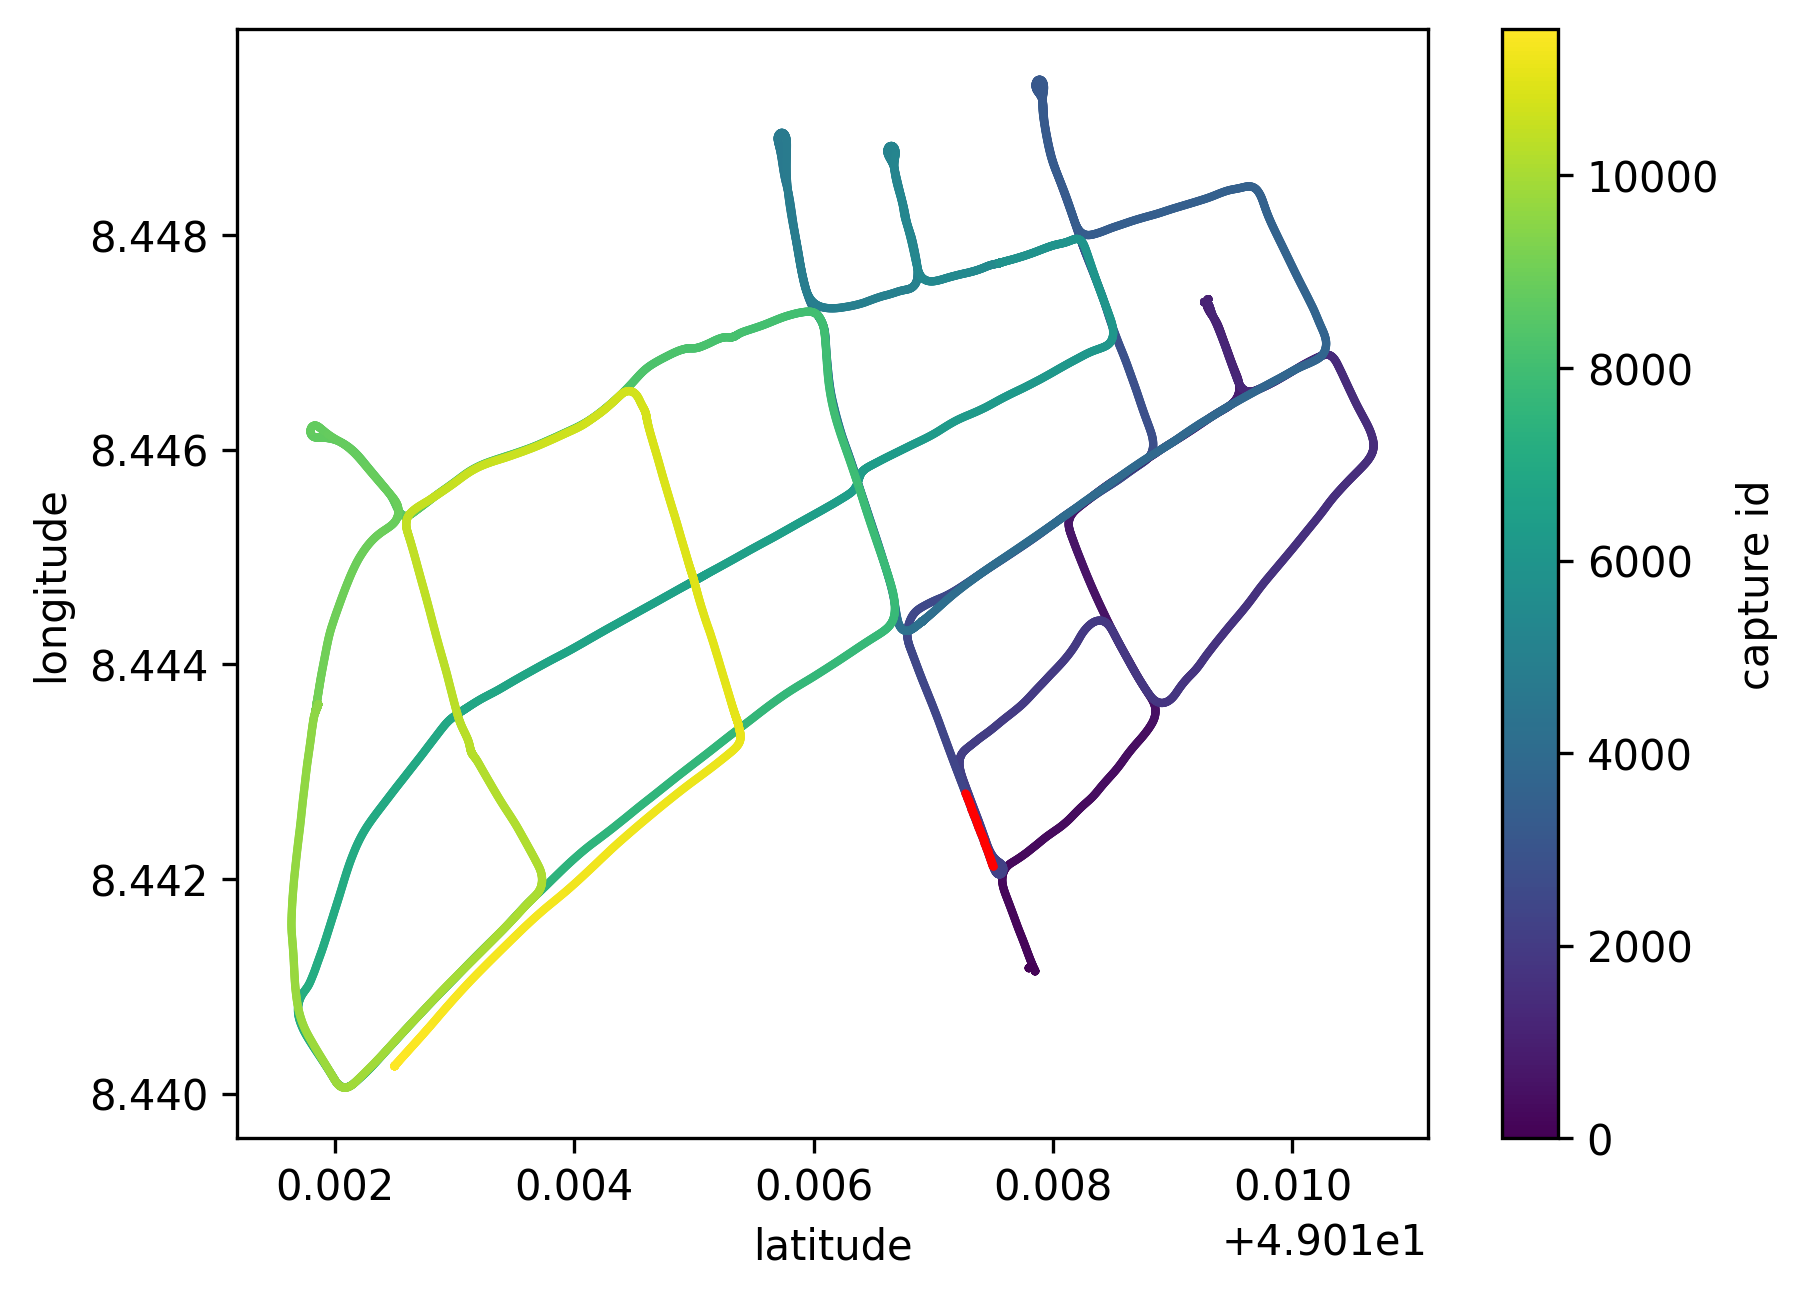

In [17]:
# plot the lat and lon and color them based on the id
# color selected ids with red, size 5
# make plot high resolution
plt.figure(dpi=300)
plt.scatter(lats, lons, c=ids, s=1)

# give the colorbar a label
plt.colorbar(label='capture id')
# label axis
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.scatter(lats[selected], lons[selected], c='r', s=1)

# plt.show()
# save the plot
plt.savefig("/home/woody/i9vl/i9vl106h/data/lat_lon.png")

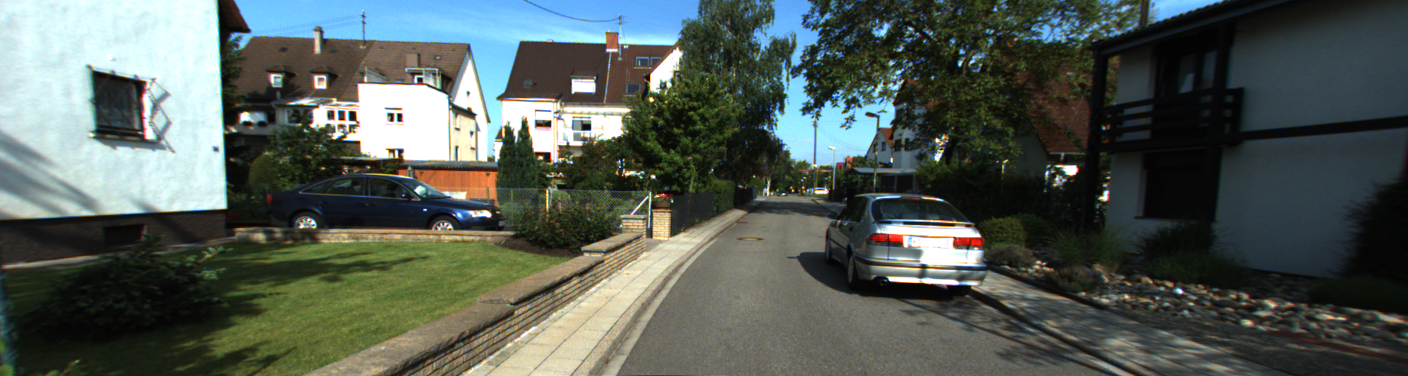

In [252]:
# middle of start and end
middle = (start+end)//2
im_path = pose_files[middle].replace("data_poses", "data_2d_raw").replace("oxts/data", "image_00/data_rect").replace(".txt", ".png")
Image.open(im_path)

In [11]:
ls /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_poses

2013_05_28_drive_0000_sync/
2013_05_28_drive_0000_sync_velodyne.zip*
2013_05_28_drive_0002_sync/
2013_05_28_drive_0003_sync/
2013_05_28_drive_0004_sync/
2013_05_28_drive_0005_sync/
2013_05_28_drive_0006_sync/
2013_05_28_drive_0006_sync_velodyne.zip.1*
2013_05_28_drive_0007_sync/
2013_05_28_drive_0008_sync/
2013_05_28_drive_0009_sync/
2013_05_28_drive_0009_sync_velodyne.zip.1*
2013_05_28_drive_0010_sync/
2013_05_28_drive_0018_sync/


In [71]:
for seq_id in seq_list[:1]:
    path = f'{os.environ["KITTI360_DATASET"]}/data_2d_raw/*{seq_id}_sync/image_00/data_rect/*'
    image_list = glob(path)
    limit_once = 100
    for i in range(0, 0+limit_once, limit_once):
        image_list_chunk = image_list[i:min(i+limit_once, len(image_list))]
        frame_ids = [int(image_path.split("/")[-1][:-4]) for image_path in image_list_chunk]
        
        frames = projectVeloToImage(cam_id=0, seq=seq_id, frames_to_project=frame_ids)
        
        # save frames to the output folder with the same name as the input file from image_list_chunk

        for ix, (frame_id, frame) in enumerate(zip(frame_ids, frames)):
            # frame is a single channel image
            # first convert it to a 3 channel image
            # then save it to the output folder
            
            frame = frame.round().astype(int)
            
            # repeat the single channel image to 3 channels
            frame = np.repeat(frame[:, :, np.newaxis], 3, axis=2)
            
            frame = np.clip(frame, 0, 255).astype(np.uint8)

            # new filename is of format {seq_id[%4d]}_{frame_id[%10d]}.png
            filename = f'{seq_id:04d}_{frame_id:010d}.png'

            # save it to the output folder using pillow
            Image.fromarray(frame).save(f'{data_path}/images_b/{filename}')

            # copy the original image to the output folder in images_a
            shutil.copy(image_list_chunk[ix], f'{data_path}/images_a/{filename}')

        print(f'Processed {len(frames)} frames from {image_list_chunk[0]} to {image_list_chunk[-1]}')

Processed 100 frames from /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect/0000000049.png to /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect/0000000104.png
Processed 100 frames from /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect/0000000056.png to /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect/0000000199.png
Processed 100 frames from /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect/0000000200.png to /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect/0000000299.png
Processed 100 frames from /home/woody/i9vl/i9vl106h/data/kitti360/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_00/data_rect/0000000300.png to /home/woody/i9vl/i9vl10

IndexError: list index out of range

In [29]:
int(image_list[].split("_")[6])

5

In [160]:
len(filelist)

4022

In [13]:
filelist = glob('/home/woody/i9vl/i9vl106h/data/lidar4d_data_res_300/train_B/*')

In [15]:
len(filelist)

1310

In [340]:
a =Image.open(filelist[-1].replace("train_B", "train_masks"))

In [345]:
np.array(a).min()

0

In [6]:
len(filelist)

1310

In [137]:
for file in filelist:
    img = Image.open(file)
    img_mask = Image.fromarray(((np.array(img) > 0)).astype(np.uint8))
    
    
    out_file = file.replace("images_b", "images_b_mask")
    
    img_mask.save(out_file)

In [16]:
validation_images = np.random.choice(filelist, int(len(filelist)*0.2), replace=False)

In [17]:
len(filelist)-len(validation_images)

1048

In [18]:
for file in validation_images:
    
    os.makedirs(os.path.dirname(file).replace("train", "val"), exist_ok=True)
    try:
        shutil.move(file, file.replace("train", "val"))
    except:
        print(file, "already moved")
    file = file.replace("train_B", "train_masks")
    
    os.makedirs(os.path.dirname(file).replace("train", "val"), exist_ok=True)
    try:
        shutil.move(file, file.replace("train", "val"))
    except:
        print(file, "already moved")

    file = file.replace("train_masks", "train_A")
    
    os.makedirs(os.path.dirname(file).replace("train", "val"), exist_ok=True)
    try:
        shutil.move(file, file.replace("train", "val"))
    except:
        print(file, "already moved")

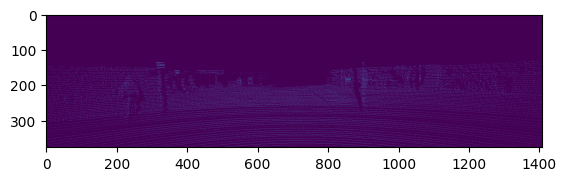

In [36]:
plt.imshow(frames[0])